In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

In [9]:
tips_data = sns.load_dataset('tips')
tips_data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
# tips_data['sex'] = tips_data['sex'].astype('category')
# tips_data['smoker'] = tips_data['smoker	'].astype('category')
# tips_data['day'] = tips_data['day'].astype('category')
# tips_data['time'] = tips_data['time'].astype('category')

tips_data[['sex', 'smoker', 'day', 'time']] = tips_data[['sex', 'smoker', 'day', 'time']].astype('category')

In [10]:
tips_data.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [11]:
tips_data.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

In [12]:
tips_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [13]:
tips_data.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [14]:
print(tips_data.sex.unique())
print(tips_data.day.unique())
print(tips_data.time.unique())
print(tips_data.smoker.unique())

['Female', 'Male']
Categories (2, object): ['Male', 'Female']
['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']
['Dinner', 'Lunch']
Categories (2, object): ['Lunch', 'Dinner']
['No', 'Yes']
Categories (2, object): ['Yes', 'No']


In [15]:
tips_data.shape

(244, 7)

In [16]:
tips_data.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [32]:
tips_data.iloc[2]

total_bill     21.01
tip              3.5
sex             Male
smoker            No
day              Sun
time          Dinner
size               3
Name: 2, dtype: object

In [18]:
tips_data.iloc[[2, 4, 6]]

,total_bill,tip,sex,smoker,day,time,size
2,21.01,3.50,Male,No,Sun,Dinner,3
4,24.59,3.61,Female,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2


In [19]:
tips_data.iloc[7:12]

,total_bill,tip,sex,smoker,day,time,size
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2
10,10.27,1.71,Male,No,Sun,Dinner,2
11,35.26,5.00,Female,No,Sun,Dinner,4


In [20]:
tips_data.loc[1:5, ['sex','smoker']]

,sex,smoker
1,Male,No
2,Male,No
3,Male,No
4,Female,No
5,Male,No


In [21]:
Q1 = tips_data.total_bill.quantile(0.25)
Q3 = tips_data.total_bill.quantile(0.75)

IQR = Q3 - Q1

print(IQR)

10.779999999999998


# Set DataFrame Visualization

In [22]:
tips_data.head(15).style.set_properties(**{'background-color' : 'black', 'color' : 'green'})

,total_bill,tip,sex,smoker,day,time,size
0,16.990000,1.010000,Female,No,Sun,Dinner,2
1,10.340000,1.660000,Male,No,Sun,Dinner,3
2,21.010000,3.500000,Male,No,Sun,Dinner,3
3,23.680000,3.310000,Male,No,Sun,Dinner,2
4,24.590000,3.610000,Female,No,Sun,Dinner,4
5,25.290000,4.710000,Male,No,Sun,Dinner,4
6,8.770000,2.000000,Male,No,Sun,Dinner,2
7,26.880000,3.120000,Male,No,Sun,Dinner,4
8,15.040000,1.960000,Male,No,Sun,Dinner,2
9,14.780000,3.230000,Male,No,Sun,Dinner,2


In [25]:
# Datatype changes
tips_data[['sex', 'smoker', 'day', 'time']] = tips_data[['sex', 'smoker', 'day', 'time']].astype('object')

In [30]:
# Set background color for min value in column containing numbers

tips_data.head(15).style.highlight_min(axis=0)

,total_bill,tip,sex,smoker,day,time,size
0,16.990000,1.010000,Female,No,Sun,Dinner,2
1,10.340000,1.660000,Male,No,Sun,Dinner,3
2,21.010000,3.500000,Male,No,Sun,Dinner,3
3,23.680000,3.310000,Male,No,Sun,Dinner,2
4,24.590000,3.610000,Female,No,Sun,Dinner,4
5,25.290000,4.710000,Male,No,Sun,Dinner,4
6,8.770000,2.000000,Male,No,Sun,Dinner,2
7,26.880000,3.120000,Male,No,Sun,Dinner,4
8,15.040000,1.960000,Male,No,Sun,Dinner,2
9,14.780000,3.230000,Male,No,Sun,Dinner,2


In [27]:
tips_data.head(15).style.highlight_max(axis=0)


,total_bill,tip,sex,smoker,day,time,size
0,16.990000,1.010000,Female,No,Sun,Dinner,2
1,10.340000,1.660000,Male,No,Sun,Dinner,3
2,21.010000,3.500000,Male,No,Sun,Dinner,3
3,23.680000,3.310000,Male,No,Sun,Dinner,2
4,24.590000,3.610000,Female,No,Sun,Dinner,4
5,25.290000,4.710000,Male,No,Sun,Dinner,4
6,8.770000,2.000000,Male,No,Sun,Dinner,2
7,26.880000,3.120000,Male,No,Sun,Dinner,4
8,15.040000,1.960000,Male,No,Sun,Dinner,2
9,14.780000,3.230000,Male,No,Sun,Dinner,2


In [33]:
cm = sns.light_palette('green',as_cmap=True)
tips_data.head(15).style.background_gradient(cmap=cm)

,total_bill,tip,sex,smoker,day,time,size
0,16.990000,1.010000,Female,No,Sun,Dinner,2
1,10.340000,1.660000,Male,No,Sun,Dinner,3
2,21.010000,3.500000,Male,No,Sun,Dinner,3
3,23.680000,3.310000,Male,No,Sun,Dinner,2
4,24.590000,3.610000,Female,No,Sun,Dinner,4
5,25.290000,4.710000,Male,No,Sun,Dinner,4
6,8.770000,2.000000,Male,No,Sun,Dinner,2
7,26.880000,3.120000,Male,No,Sun,Dinner,4
8,15.040000,1.960000,Male,No,Sun,Dinner,2
9,14.780000,3.230000,Male,No,Sun,Dinner,2


In [34]:
tips_data.head(15).style.background_gradient(cmap=cm).highlight_min(axis=0, color='lightblue').highlight_max(axis=0,  color='blue')

,total_bill,tip,sex,smoker,day,time,size
0,16.990000,1.010000,Female,No,Sun,Dinner,2
1,10.340000,1.660000,Male,No,Sun,Dinner,3
2,21.010000,3.500000,Male,No,Sun,Dinner,3
3,23.680000,3.310000,Male,No,Sun,Dinner,2
4,24.590000,3.610000,Female,No,Sun,Dinner,4
5,25.290000,4.710000,Male,No,Sun,Dinner,4
6,8.770000,2.000000,Male,No,Sun,Dinner,2
7,26.880000,3.120000,Male,No,Sun,Dinner,4
8,15.040000,1.960000,Male,No,Sun,Dinner,2
9,14.780000,3.230000,Male,No,Sun,Dinner,2


# Data Visualization

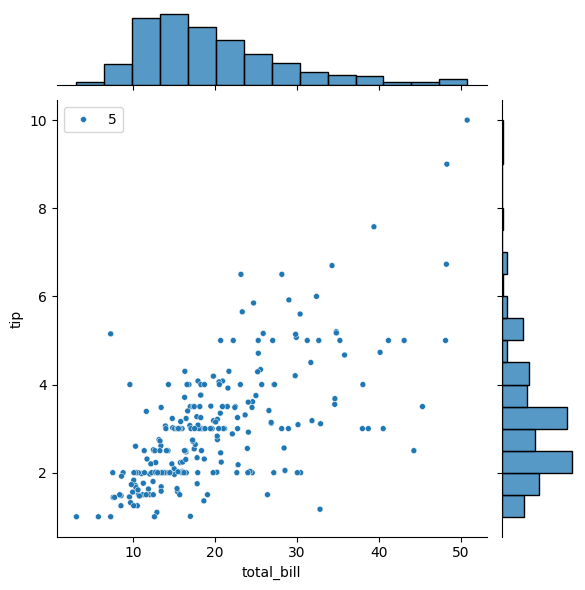

In [35]:
sns.jointplot(x='total_bill', y='tip', data=tips_data, size=5)

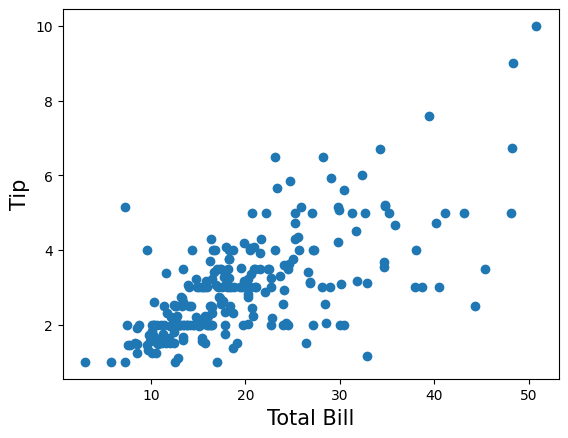

In [36]:
X = tips_data['total_bill']
Y = tips_data['tip']

plt.scatter(X, Y)

plt.xlabel('Total Bill', size=15)
plt.ylabel('Tip', size=15)

plt.show()

In [37]:
import numpy as np

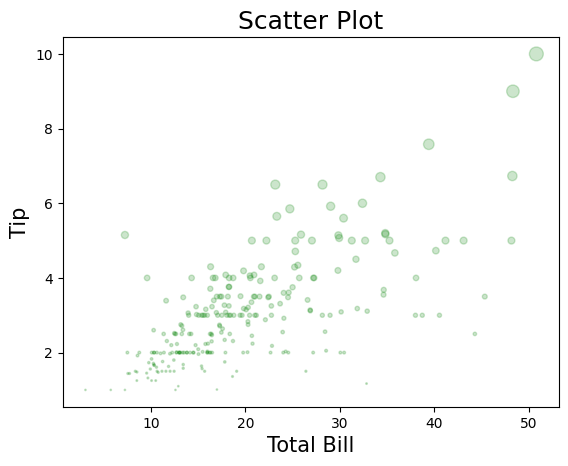

In [38]:
X = tips_data['total_bill']
Y = tips_data['tip']

plt.scatter(X, Y, s=np.array(Y)**2, c='green', alpha=0.2)

plt.title('Scatter Plot', size= 18)
plt.xlabel('Total Bill', size=15)
plt.ylabel('Tip', size=15)

plt.show()

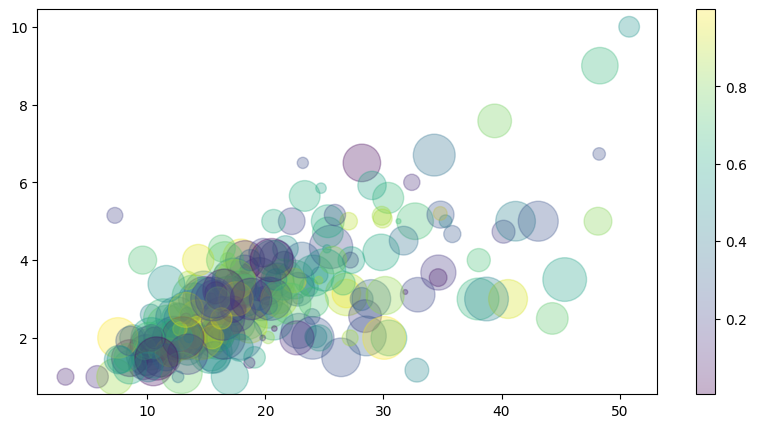

In [39]:
rng = np.random.RandomState(0)
colors = rng.rand(len(tips_data))
sizes = 1000 * rng.rand(len(tips_data))

plt.figure(figsize=(10, 5))
x = tips_data['total_bill']
y = tips_data['tip']

plt.scatter(x, y, c=colors[:], s=sizes, alpha=0.3, cmap='viridis')

plt.colorbar()

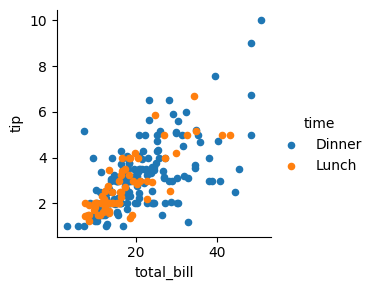

In [40]:
# FacetGrid:

sns.FacetGrid(tips_data, hue='time')\
    .map(plt.scatter, 'total_bill', 'tip', s=20)\
        .add_legend()

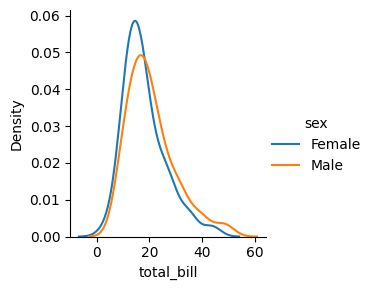

In [41]:
sns.FacetGrid(tips_data, hue='sex').map(sns.kdeplot, 'total_bill').add_legend()

(array([ 7., 42., 68., 51., 31., 19., 12.,  7.,  3.,  4.]),
 array([ 3.07 ,  7.844, 12.618, 17.392, 22.166, 26.94 , 31.714, 36.488,
        41.262, 46.036, 50.81 ]),
 <BarContainer object of 10 artists>)

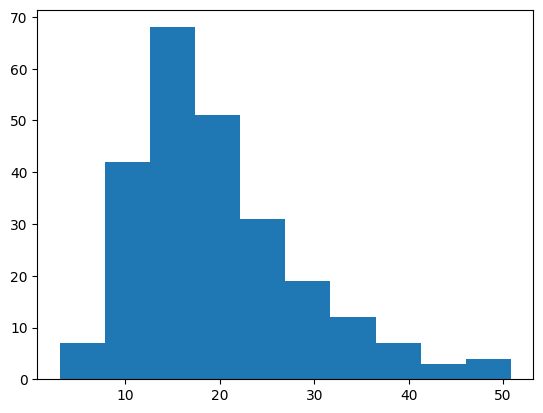

In [42]:
# Hist Plot:

plt.hist(tips_data['total_bill'])


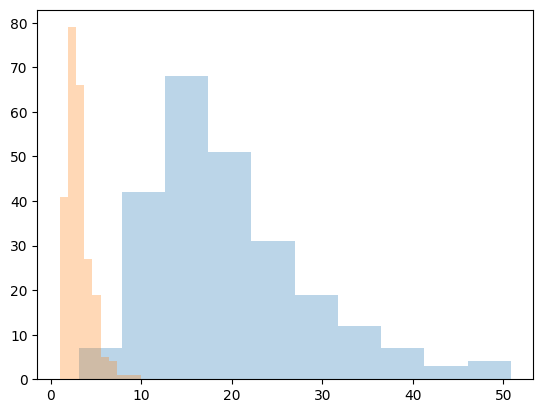

In [43]:
x1 = tips_data['total_bill']
x2 = tips_data['tip']

kwargs = dict(histtype='stepfilled', alpha=0.3)

# plt.hist(x1, alpha=0.3)
# plt.hist(x2, alpha=0.3)
plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)

plt.show()

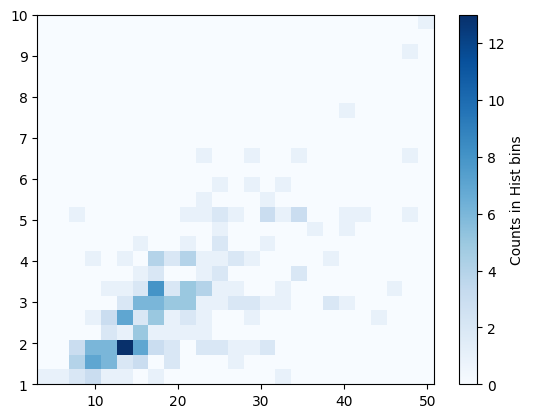

In [44]:
x = tips_data['total_bill']
y = tips_data['tip']

plt.hist2d(x, y, bins=25, cmap='Blues')
cb = plt.colorbar()
cb.set_label('Counts in Hist bins')

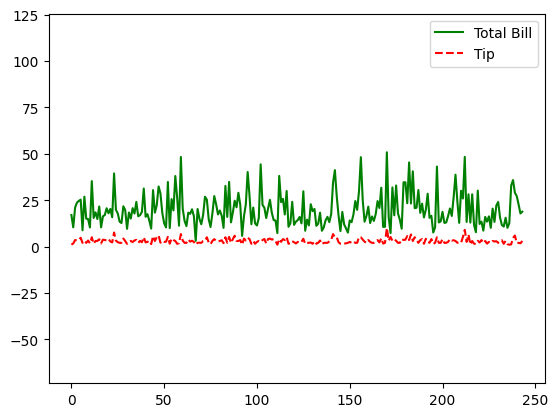

In [45]:
# Sub Plot:

x = tips_data['total_bill']
y = tips_data['tip']

fig, ax = plt.subplots()
ax.plot(x,'-g', label='Total Bill')
ax.plot(y, '--r', label='Tip')
ax.axis('equal')
leg = ax.legend()

plt.show()


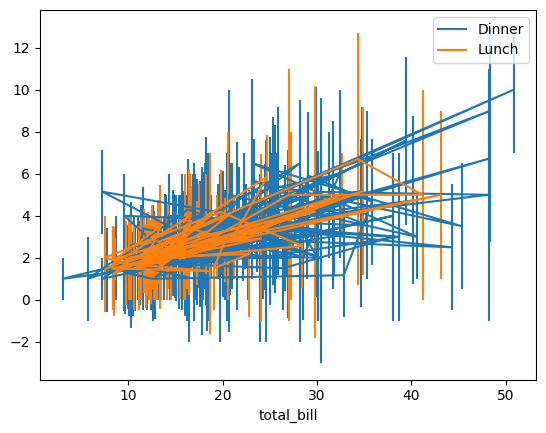

In [46]:
fig, ax = plt.subplots()
for key, group in tips_data.groupby('time'):
    group.plot('total_bill', 'tip', yerr='size', label=key, ax=ax)

plt.show()

In [47]:
# Bar Plot:

set(tips_data['smoker'])
# tips_data['smoker'].unique()

{'No', 'Yes'}

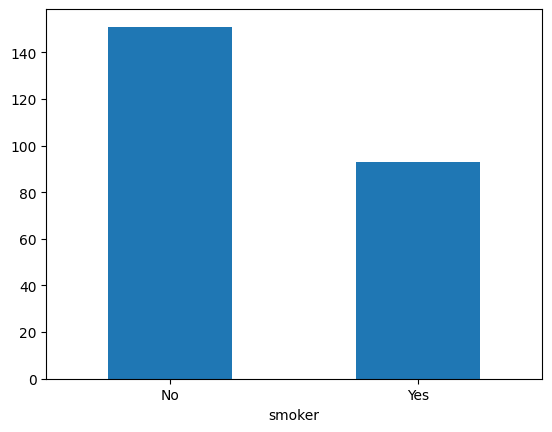

In [48]:
p = tips_data.smoker.value_counts()
p.plot(kind='bar', rot=0)
plt.show()

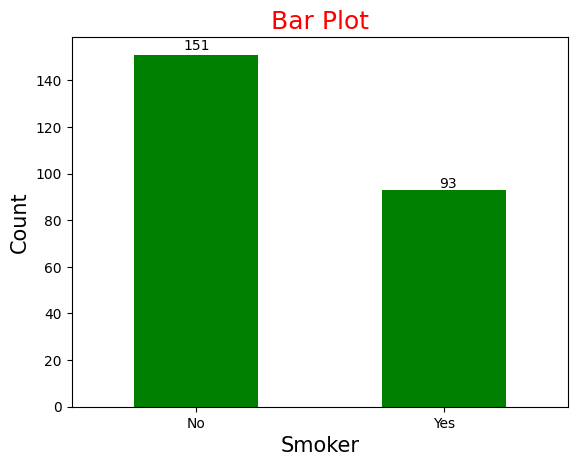

In [49]:
tips_data.smoker.value_counts().plot(kind='bar', rot=0, color='green')

plt.text(x= 0.98 , y= tips_data.smoker.value_counts()[1]+1, s= tips_data.smoker.value_counts()[1])
plt.text(x= -0.05, y= tips_data.smoker.value_counts()[0]+2, s=tips_data.smoker.value_counts()[0])

plt.title('Bar Plot', fontsize= 18, c= 'red')
plt.xlabel('Smoker', size= 15)
plt.ylabel('Count', size= 15)

plt.show()

In [50]:
tips_data.value_counts()

total_bill  tip    sex     smoker  day   time    size
13.00       2.00   Female  Yes     Thur  Lunch   2       2
5.75        1.00   Female  Yes     Fri   Dinner  2       1
3.07        1.00   Female  Yes     Sat   Dinner  1       1
7.25        5.15   Male    Yes     Sun   Dinner  2       1
7.51        2.00   Male    No      Thur  Lunch   2       1
                                                        ..
45.35       3.50   Male    Yes     Sun   Dinner  3       1
48.17       5.00   Male    No      Sun   Dinner  6       1
48.27       6.73   Male    No      Sat   Dinner  4       1
48.33       9.00   Male    No      Sat   Dinner  4       1
50.81       10.00  Male    Yes     Sat   Dinner  3       1
Name: count, Length: 243, dtype: int64

In [51]:
tips_data.day.value_counts()

day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64

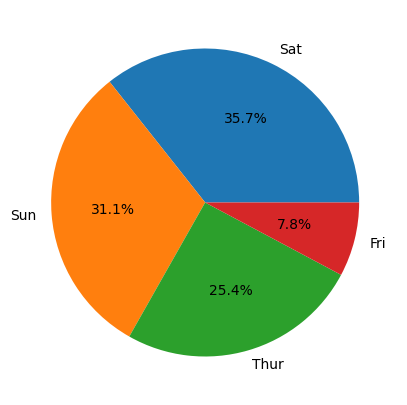

In [52]:
# Pie Chart:

plt.figure(figsize=(12, 5))

plt.pie(tips_data.day.value_counts(), autopct='%0.1f%%', radius=1, labels=['Sat', 'Sun', 'Thur', 'Fri'])

plt.show()


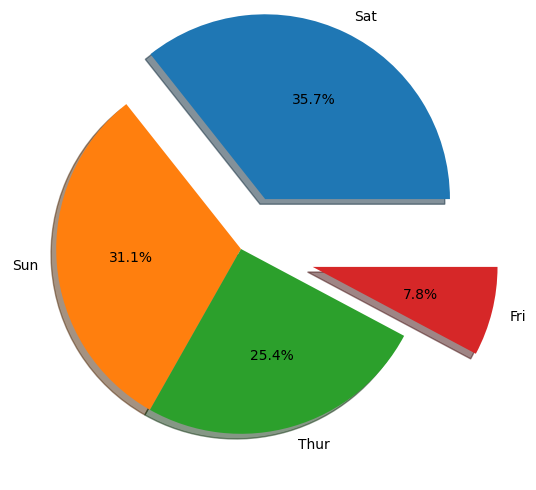

In [53]:
#eploded pie chart

plt.figure(figsize=(12, 6))
pi = tips_data.day.value_counts()

plt.pie(pi, autopct= '%0.01f%%', radius=1, labels=['Sat', 'Sun', 'Thur', 'Fri'], explode=[0.3,0,0,0.4], shadow=True)

plt.show()

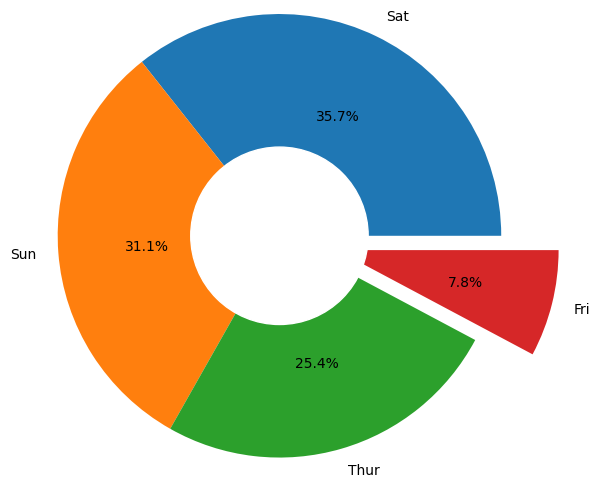

In [54]:
# donut pie plot

dpie = tips_data.day.value_counts()

plt.pie(dpie, autopct='%.1f%%', radius=1.5, labels=['Sat', 'Sun', 'Thur', 'Fri'], explode=[0,0,0,0.4])

circle = plt.Circle((0,0), 0.6, color='white')
plot = plt.gcf()
plot.gca().add_artist(circle)

plt.show()

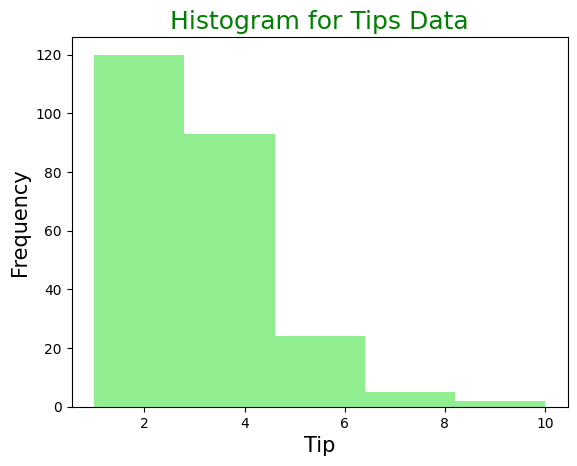

In [55]:
#plot the histogram

plt.hist(tips_data['tip'], bins=5, color='lightgreen')

plt.title('Histogram for Tips Data', size=18, color='Green')
plt.xlabel('Tip', size=15)
plt.ylabel('Frequency', size=15)

plt.show()

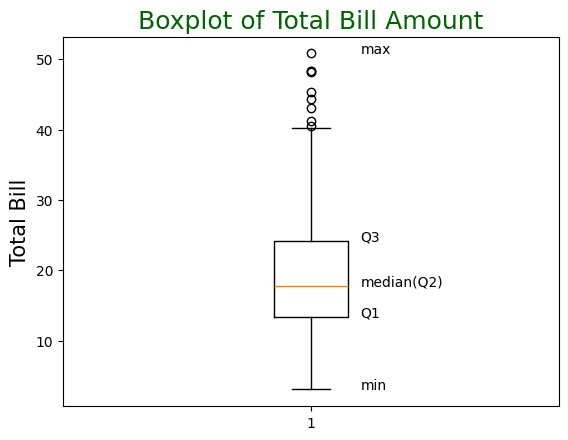

In [56]:
# Box Plot:

plt.boxplot(tips_data['total_bill'])

plt.text(x= 1.1, y= tips_data['total_bill'].min(), s='min')
plt.text(x= 1.1, y= tips_data.total_bill.quantile(0.25), s='Q1')
plt.text(x= 1.1, y=tips_data['total_bill'].median(), s='median(Q2)')
plt.text(x= 1.1, y=tips_data.total_bill.quantile(0.75), s='Q3')
plt.text(x= 1.1, y=tips_data['total_bill'].max(), s='max')

plt.title('Boxplot of Total Bill Amount', fontsize=18, color='darkgreen')
plt.ylabel('Total Bill', fontsize=15)


plt.show()


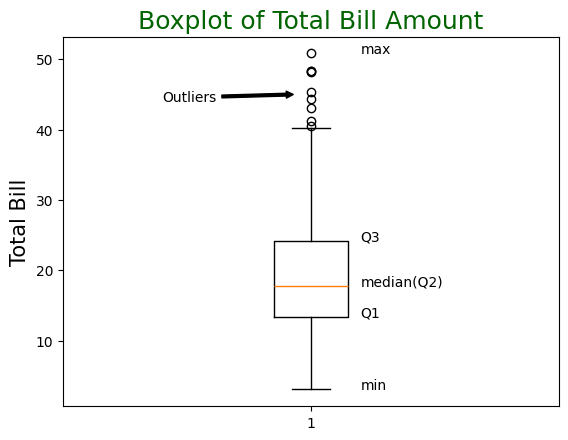

In [57]:
plt.boxplot(tips_data['total_bill'])


plt.text(x= 1.1, y= tips_data['total_bill'].min(), s='min')
plt.text(x= 1.1, y= tips_data.total_bill.quantile(0.25), s='Q1')
plt.text(x= 1.1, y=tips_data['total_bill'].median(), s='median(Q2)')
plt.text(x= 1.1, y=tips_data.total_bill.quantile(0.75), s='Q3')
plt.text(x= 1.1, y=tips_data['total_bill'].max(), s='max')

plt.annotate('Outliers', xy=(0.97, 45), xytext=(0.7, 44), arrowprops=dict(facecolor='black', arrowstyle='simple'))

plt.title('Boxplot of Total Bill Amount', fontsize=18, color='darkgreen')
plt.ylabel('Total Bill', fontsize=15)

plt.show()

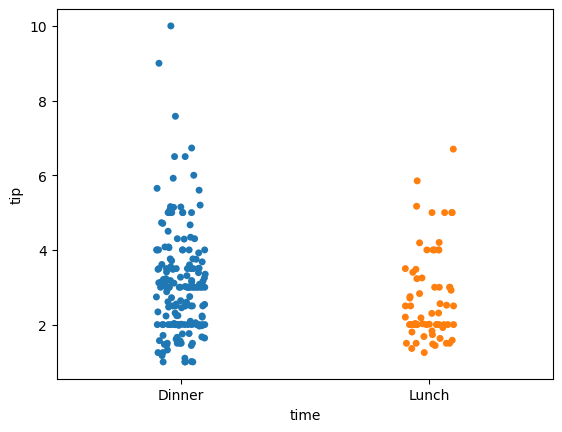

In [58]:
# Strip Plot:

sns.stripplot(x= 'time',y= 'tip', data=tips_data, hue='time')

plt.show()

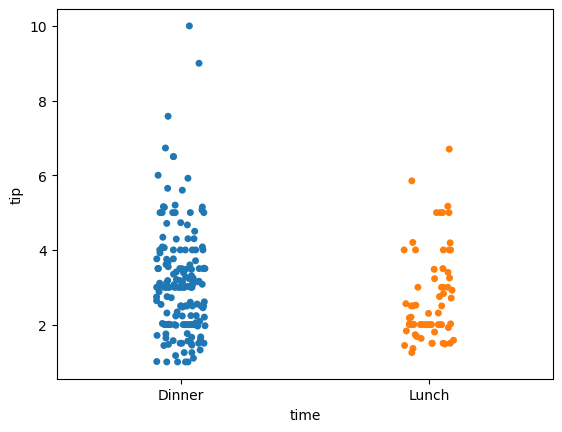

In [59]:
#strip plot with jitter to spread the points

sns.stripplot(x= 'time',y= 'tip', data=tips_data, hue='time',jitter=True)

plt.show()

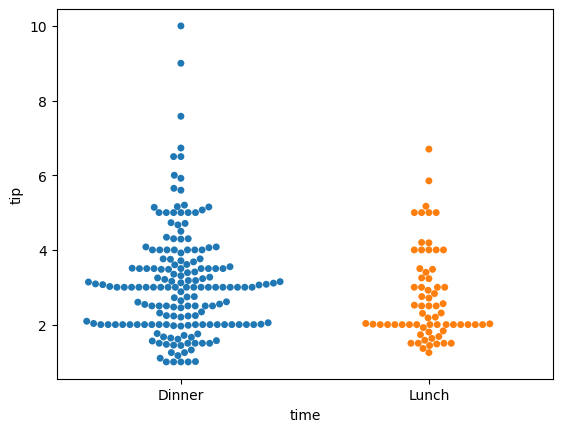

In [60]:
# Swarm Plot:

sns.swarmplot(y='tip', x='time', data=tips_data, hue='time')

plt.show()

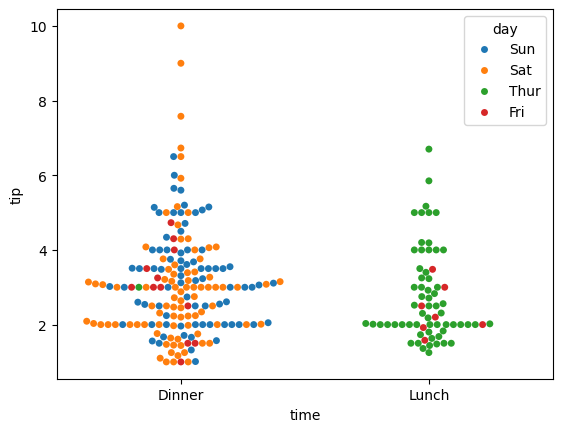

In [61]:
# Swarm Plot:

sns.swarmplot(y='tip', x='time', data=tips_data, hue='day')

plt.show()

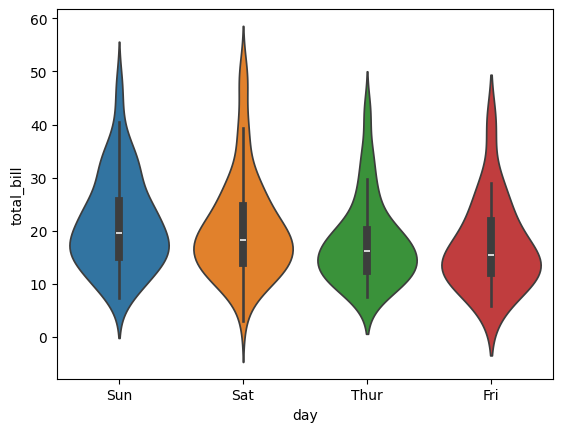

In [62]:
# Violin Plot:

sns.violinplot(y='total_bill', x='day', data= tips_data, hue='day')

plt.show()

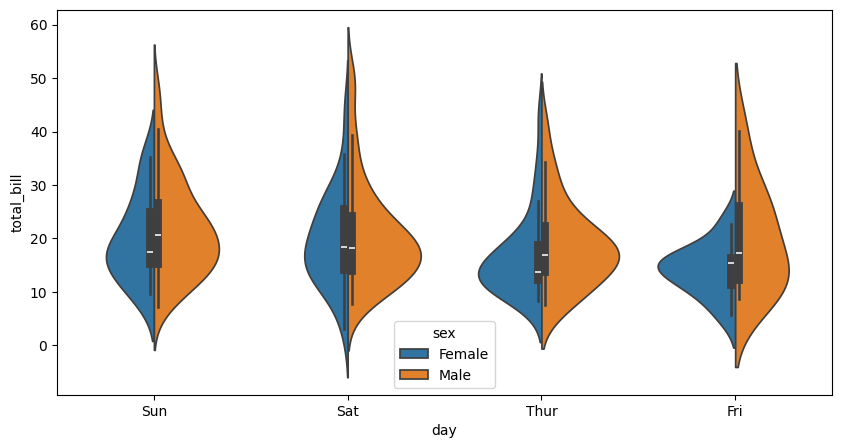

In [63]:
plt.figure(figsize=(10, 5))

sns.violinplot(y='total_bill', x='day', data=tips_data, hue='sex', split=True)

plt.show()

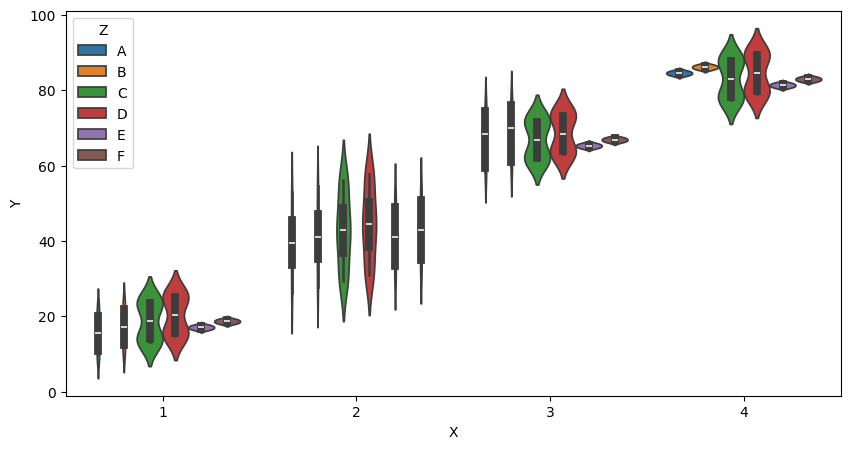

In [64]:
X = [1]*50+[2]*100+[3]*60+[4]*40

Y = np.linspace(10, 90, 250)

Z = (['A']*5+ ['B']*5+ ['C']*5+ ['D']*5+ ['E']*5+ ['F']*5+ ['A']*5+ ['B']*5+ ['C']*5+ ['D']*5)*5

data = pd.DataFrame({'X':X, 'Y':Y, 'Z':Z})

plt.figure(figsize=(10, 5))

sns.violinplot(y='Y', x='X', data=data, hue='Z', split=False)

plt.show()

<Axes: xlabel='total_bill', ylabel='tip'>

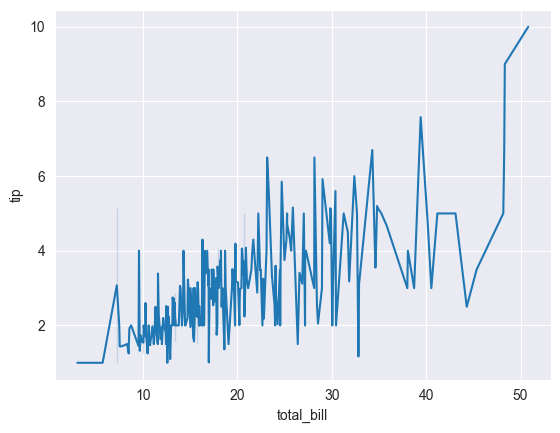

In [65]:
# Line Plot:
sns.set_style('darkgrid')
sns.lineplot(x='total_bill', y='tip', data=tips_data)

<Axes: xlabel='total_bill', ylabel='tip'>

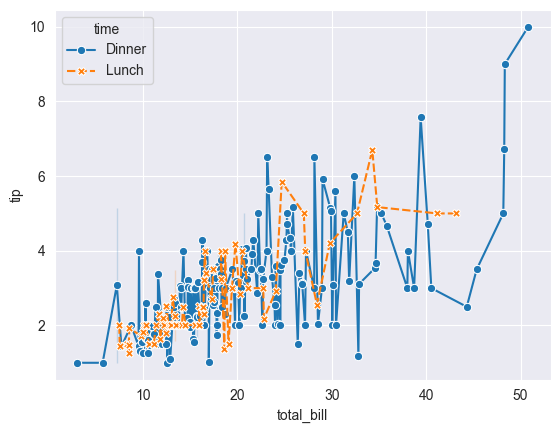

In [66]:
sns.lineplot(x='total_bill', y='tip', data=tips_data, hue='time', style='time', markers=True, dashes=True)

<Figure size 800x800 with 0 Axes>

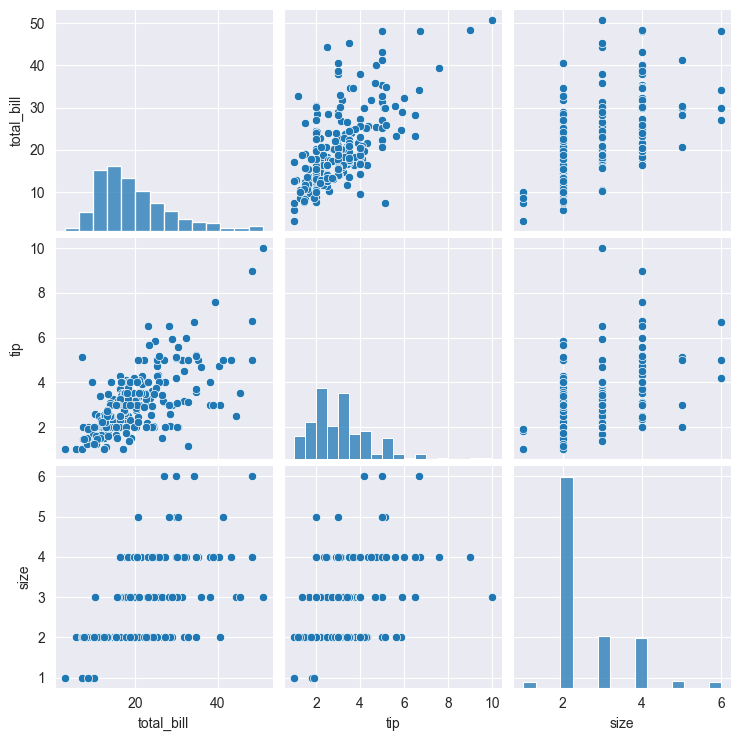

In [67]:
# Pair Plot:

plt.figure(figsize=(8, 8))

sns.pairplot(tips_data)
plt.show()

<Figure size 800x800 with 0 Axes>

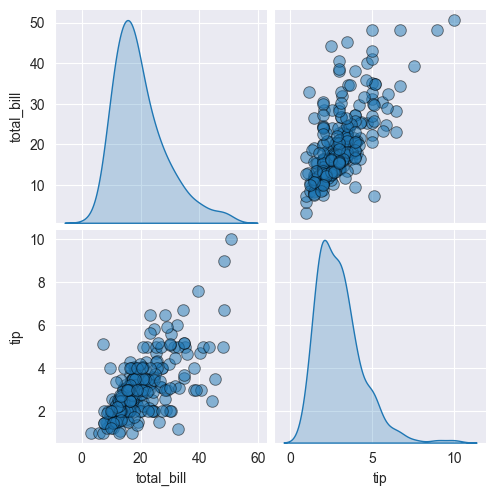

In [68]:
plt.figure(figsize=(8, 8))
sns.pairplot(tips_data, vars=['total_bill', 'tip'], diag_kind='kde', 
             plot_kws={'alpha': 0.5, 's': 70, 'edgecolor':'k'})

plt.show()

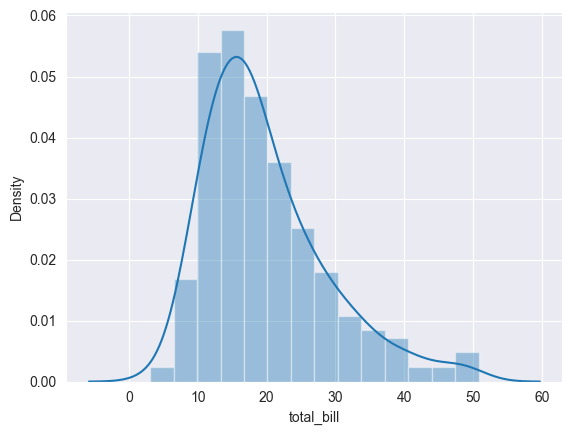

In [69]:
# Distribution Plot:

sns.distplot(tips_data['total_bill'])

plt.show()

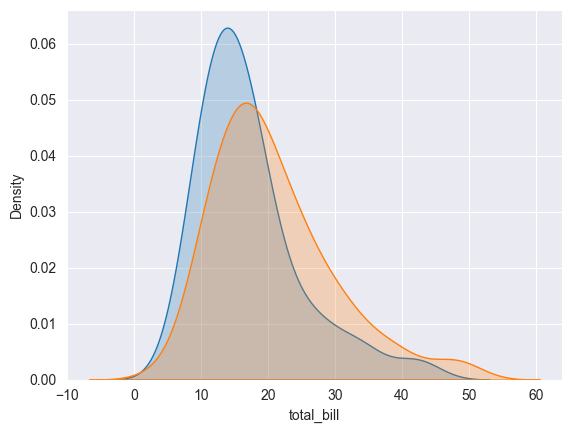

In [70]:
time = ['Lunch', 'Dinner']

for i in time:
    subset = tips_data[tips_data['time'] == i]
    
    sns.distplot(subset['total_bill'], hist=False, kde= True, kde_kws= {'shade': True}, label=i)


plt.show()



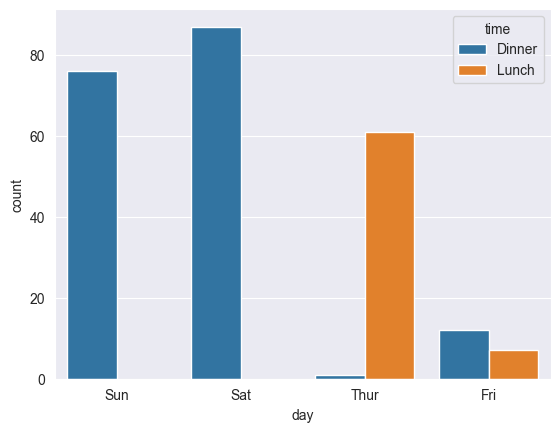

In [71]:
# Count Plot:

sns.countplot(x='day', data=tips_data, hue='time')

plt.show()

In [72]:
# Heatmap:

corr_matrix = tips_data[['total_bill', 'tip', 'size']].corr()

corr_matrix

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


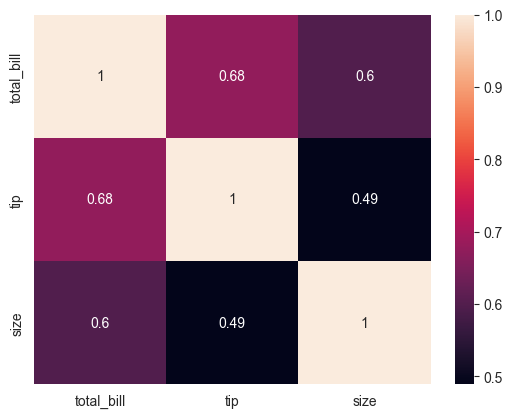

In [73]:
sns.heatmap(corr_matrix, annot=True)

plt.show()